In [1]:
import pandas as pd
from datetime import datetime
import random
import numpy as np


# All imports

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
file_path = 'Final_tourism_df .csv'
df = pd.read_csv(file_path)

In [3]:
df

,Tourist_ID,Reservation_ID,passport_number,name,email,phone-number,credit_card,Age,workclass,marital-status,...,Total_Spendings,Subscribed_to_Loyalty_Program,Visited_attraction,Visitor_thoughts,Travel_type,Review,cluster,Num_of_Visits,Other,Asia
0,1001,1,HHXRD9D90,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,25,Private,Never-married,...,8233,True,Pearl,A must-visit spot for anyone looking to add a ...,Solo,"You stroll along the mesmerizing marina, and t...",NaN,6,NaN,NaN
1,1002,2,WLS8HDNPC,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,38,Private,Married-civ-spouse,...,24264,True,Pearl,Stay in hotel,Solo,The rooms were very neat and clean The views f...,NaN,2,NaN,NaN
2,1003,3,INZ9YKCVL,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,28,Local-gov,Married-civ-spouse,...,17584,False,Pearl,Amazing and comfortable stay,Family,Nice place to go to amazing views good restaur...,NaN,4,NaN,NaN
3,1004,4,A0VBK79WA,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,44,Private,Married-civ-spouse,...,9209,False,Pearl,A Real Pearl,Family,The Pearl is a great place to stroll around es...,NaN,6,NaN,NaN
4,1005,5,CXADDEOGB,Linda Hines,LHines@verizon.com,713-226-5883,************5498,18,NaN,Never-married,...,21903,True,Pearl,Luxury and Nature,Solo,The Pearl-Qatar is a really well-planned place...,NaN,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5996,4996,V45NH6A4E,Richard Long,Long.Richard58@mail.com,NaN,NaN,49,NaN,Married-civ-spouse,...,2521,False,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
4996,5997,4997,PFYMJRKDF,Debbie Patel,Debbie_Patel73@outlook.com,NaN,************6797,35,Federal-gov,Married-spouse-absent,...,3745,False,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
4997,5998,4998,ZAP6H6W1P,Eric Russell,Eric.Russell@xfinity.com,NaN,************5786,40,Private,Divorced,...,20794,True,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
4998,5999,4999,KTVZ9JAP8,Elizabeth Taylor,Elizabeth_Taylor@aol.com,470-941-5606,************7594,50,NaN,Married-civ-spouse,...,11734,True,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [4]:
df.columns

Index(['Tourist_ID', 'Reservation_ID', 'passport_number', 'name', 'email',
       'phone-number', 'credit_card', 'Age', 'workclass', 'marital-status',
       'occupation', 'education', 'street_address', 'zipcode', 'gender',
       'Modes_of_Travel', 'Combined_Date', 'Year', 'Month', 'Income_USD',
       'arrivals_by_region', 'Nationality', 'Hobby', 'payment_preferences',
       'Cuisine', 'Preferred_Travel_Seasons', 'Frequency_of_Travel',
       'package_types', 'package_cost', 'package_price', 'profit',
       'Transportation_Mode', 'Event_Type', 'Room_Preferences', 'Hotel_Type',
       'Location', 'Total_Spendings', 'Subscribed_to_Loyalty_Program',
       'Visited_attraction', 'Visitor_thoughts', 'Travel_type', 'Review',
       'cluster', 'Num_of_Visits', 'Other', 'Asia '],
      dtype='object')

In [5]:
df.dtypes

Tourist_ID                         int64
Reservation_ID                     int64
passport_number                   object
name                              object
email                             object
phone-number                      object
credit_card                       object
Age                                int64
workclass                         object
marital-status                    object
occupation                        object
education                         object
street_address                    object
zipcode                            int64
gender                            object
Modes_of_Travel                   object
Combined_Date                     object
Year                               int64
Month                             object
Income_USD                        object
arrivals_by_region                object
Nationality                       object
Hobby                             object
payment_preferences               object
Cuisine         

In [6]:
df.isnull().sum()

Tourist_ID                          0
Reservation_ID                      0
passport_number                     0
name                                0
email                            1000
phone-number                      789
credit_card                       579
Age                                 0
workclass                         315
marital-status                      0
occupation                        315
education                         329
street_address                   1389
zipcode                             0
gender                              0
Modes_of_Travel                     0
Combined_Date                       0
Year                                0
Month                               0
Income_USD                          0
arrivals_by_region                  0
Nationality                         0
Hobby                              44
payment_preferences               254
Cuisine                             0
Preferred_Travel_Seasons            0
Frequency_of

# Fill email and phone

In [7]:
df['email'] = df['name'].str.lower().str.replace(' ', '.', regex=False) + '@example.com'

In [8]:
def generate_specific_phone_number():
    last_part = np.random.randint(1000, 10000)
    return f"669-792-{last_part}"

# Generating a specific phone number for each record in the DataFrame
df['phone-number'] = [generate_specific_phone_number() for _ in range(len(df))]

In [9]:
df.isnull().sum()

Tourist_ID                          0
Reservation_ID                      0
passport_number                     0
name                                0
email                               0
phone-number                        0
credit_card                       579
Age                                 0
workclass                         315
marital-status                      0
occupation                        315
education                         329
street_address                   1389
zipcode                             0
gender                              0
Modes_of_Travel                     0
Combined_Date                       0
Year                                0
Month                               0
Income_USD                          0
arrivals_by_region                  0
Nationality                         0
Hobby                              44
payment_preferences               254
Cuisine                             0
Preferred_Travel_Seasons            0
Frequency_of

# Adding clusters

In [31]:
# Ensuring Combined_Date is in datetime format
df['Combined_Date'] = pd.to_datetime(df['Combined_Date'])

# Finding the most recent date as a reference point
most_recent_date = df['Combined_Date'].max()

# Calculating the difference in days from the most recent date so they can be normalized
df['Recency'] = (most_recent_date - df['Combined_Date']).dt.days
df['Frequency'] = df['Num_of_Visits']
df['Monetary'] = df['Monetary']

# Normalizing the RFM scores to ensure they follow the same scale
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df[['Recency', 'Frequency', 'Monetary']])

# Step 4: Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(rfm_scaled)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
df['cluster']

0       2
1       2
2       2
3       2
4       2
       ..
4995    0
4996    0
4997    0
4998    1
4999    1
Name: cluster, Length: 5000, dtype: int32

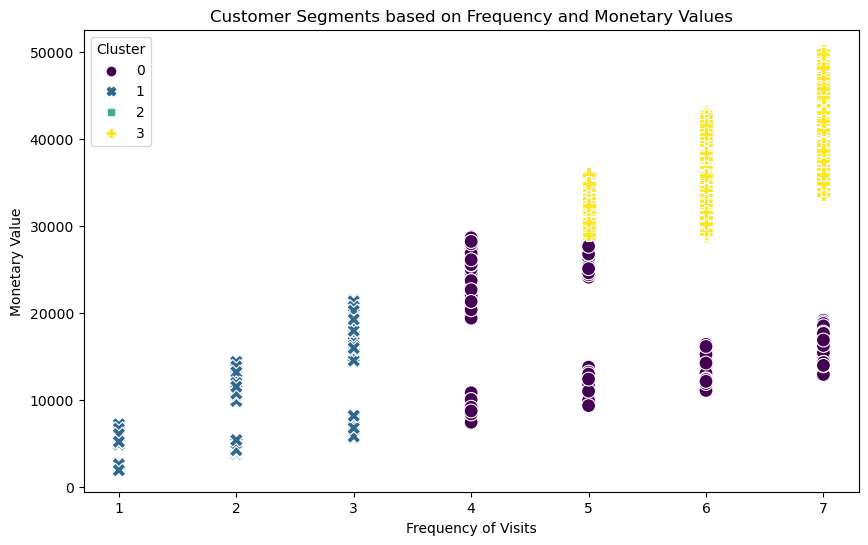

In [33]:
# now lets visualize our clusters

plt.figure(figsize=(10, 6))

# Use seaborn to create the scatter plot and color the points based on the 'cluster' column
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='cluster', palette='viridis', style='cluster', s=100)

# Adding plot title and labels
plt.title('Customer Segments based on Frequency and Monetary Values')
plt.xlabel('Frequency of Visits')
plt.ylabel('Monetary Value')

# Show legend
plt.legend(title='Cluster')

# Show the plot
plt.show()

In [34]:
# making the clusters more scattered more natural 

np.random.seed(42)  # For reproducibility

monetary_ranges = {
    0: (25000, 45000),
    1: (55000, 80000),
    2: (45000, 60000),
    3: (35000, 50000)
}

frequency_ranges = {
    0: (1, 2),
    1: (4, 5),
    2: (2, 3),
    3: (3, 4)
}

# Generate data with less variability around cluster centers
for cluster in df['cluster'].unique():
    center_monetary = np.mean(monetary_ranges[cluster])
    center_frequency = np.mean(frequency_ranges[cluster])
    
    # Assuming a smaller standard deviation for less variability
    monetary_std = (monetary_ranges[cluster][1] - monetary_ranges[cluster][0]) / 6
    frequency_std = (frequency_ranges[cluster][1] - frequency_ranges[cluster][0]) / 6
    
    df.loc[df['cluster'] == cluster, 'Monetary'] = np.random.normal(center_monetary, monetary_std, size=len(df[df['cluster'] == cluster]))
    df.loc[df['cluster'] == cluster, 'Frequency'] = np.random.normal(center_frequency, frequency_std, size=len(df[df['cluster'] == cluster]))

In [40]:
df['Num_of_Visits'] = df['Frequency']
df['Income_USD'] = df['Monetary']


In [42]:
print(df[['Num_of_Visits','Frequency','Income_USD','Monetary']])

      Num_of_Visits  Frequency    Income_USD      Monetary
0          2.481279   2.481279  53741.785383  53741.785383
1          2.463172   2.463172  52154.339247  52154.339247
2          2.602361   2.602361  54119.221345  54119.221345
3          2.626251   2.626251  56307.574641  56307.574641
4          2.411583   2.411583  51914.616563  51914.616563
...             ...        ...           ...           ...
4995       1.382447   1.382447  42301.390004  42301.390004
4996       1.582628   1.582628  37941.323633  37941.323633
4997       1.607398   1.607398  38424.931145  38424.931145
4998       4.464035   4.464035  61484.982241  61484.982241
4999       4.303706   4.303706  65487.875669  65487.875669

[5000 rows x 4 columns]


In [43]:
df[['Num_of_Visits', 'Frequency', 'Income_USD', 'Monetary']] = df[['Num_of_Visits', 'Frequency', 'Income_USD', 'Monetary']].round(0)

In [44]:
print(df[['Num_of_Visits','Frequency','Income_USD','Monetary']])

      Num_of_Visits  Frequency  Income_USD  Monetary
0               2.0        2.0     53742.0   53742.0
1               2.0        2.0     52154.0   52154.0
2               3.0        3.0     54119.0   54119.0
3               3.0        3.0     56308.0   56308.0
4               2.0        2.0     51915.0   51915.0
...             ...        ...         ...       ...
4995            1.0        1.0     42301.0   42301.0
4996            2.0        2.0     37941.0   37941.0
4997            2.0        2.0     38425.0   38425.0
4998            4.0        4.0     61485.0   61485.0
4999            4.0        4.0     65488.0   65488.0

[5000 rows x 4 columns]


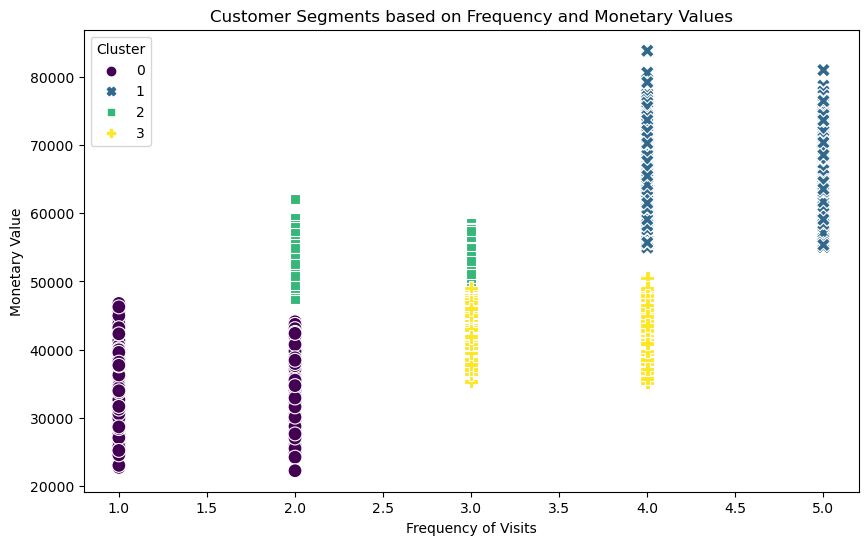

In [45]:
# now lets visualize our clusters

plt.figure(figsize=(10, 6))

# Use seaborn to create the scatter plot and color the points based on the 'cluster' column
sns.scatterplot(data=df, x='Frequency', y='Monetary', hue='cluster', palette='viridis', style='cluster', s=100)

# Adding plot title and labels
plt.title('Customer Segments based on Frequency and Monetary Values')
plt.xlabel('Frequency of Visits')
plt.ylabel('Monetary Value')

# Show legend
plt.legend(title='Cluster')

# Show the plot
plt.show()

# Customer Collection

In [36]:
customer_df = df[['Tourist_ID',
       'passport_number', 'name', 'email', 'phone-number', 'credit_card',
       'Age', 'workclass', 'marital-status', 'occupation', 'education',
       'street_address', 'zipcode', 'gender', 'Hobby',
       'payment_preferences', 'Cuisine', 'cluster']] # primary key : Tourist_ID

In [37]:
customer_df.head()

,Tourist_ID,passport_number,name,email,phone-number,credit_card,Age,workclass,marital-status,occupation,education,street_address,zipcode,gender,Hobby,payment_preferences,Cuisine,cluster
0,1001,HHXRD9D90,Ernest Barnes,ernest.barnes@example.com,669-792-6851,************4322,25,Private,Never-married,Machine-op-inspct,11th,NaN,35430,Male,Swimming,PayPal,Japanese,2
1,1002,WLS8HDNPC,Andrea Baker,andrea.baker@example.com,669-792-1612,************9157,38,Private,Married-civ-spouse,Farming-fishing,HS-grad,NaN,87887,Male,Cycling,Credit Card,Indian,2
2,1003,INZ9YKCVL,Rebecca Parker,rebecca.parker@example.com,669-792-1473,************3734,28,Local-gov,Married-civ-spouse,Protective-serv,NaN,3249 Hubbard Ranch Suite 288,84393,Male,Playing musical instruments,Bank Transfer,Other,2
3,1004,A0VBK79WA,Laura Murray,laura.murray@example.com,669-792-3891,************5677,44,Private,Married-civ-spouse,Machine-op-inspct,Some-college,751 Patricia Garden,69130,Male,Painting,Credit Card,Mexican,2
4,1005,CXADDEOGB,Linda Hines,linda.hines@example.com,669-792-6816,************5498,18,NaN,Never-married,NaN,Some-college,3171 Robert Pike,95217,Female,Hiking,Credit Card,Italian,2


In [52]:
csv_file_path = 'customer.csv'
customer_df.to_csv(csv_file_path, index=False)  # Set index=False to avoid writing row indices

csv_file_path

'customer.csv'

# Package Collection

In [46]:
# Getting the unique values in the 'Num_of_Visits' column
df['Num_of_Visits'].unique()

array([2., 3., 4., 5., 1.])

In [47]:
df['Num_of_Visits'] = np.random.randint(1, 8, size=len(df))
df['Num_of_Visits'].unique()

array([2, 1, 7, 5, 6, 4, 3])

In [48]:
df['Income_USD'].unique()

array([53742., 52154., 54119., ..., 37941., 38425., 61485.])

In [49]:
# Updated function to generate incomes as multiples of 10 within specified ranges
def convert_income_to_multiple_of_10(income_str):
    if income_str == '<=50K':
        # Generate a random value in the specified range and round it to the nearest multiple of 10
        return np.round(np.random.randint(2000, 5000) * 10, -1)
    elif income_str == '>50K':
        # Generate a random value in the specified range and round it to the nearest multiple of 10
        return np.round(np.random.randint(5000, 10000) * 10, -1)

# Reassign conditions to match the corrected "<=50K" and ">50K"
df['Income_USD'] = np.random.choice(['<=50K', '>50K'], size=len(df))

# Apply the updated conversion function to each row for rounding to the nearest multiple of 10
df['Income_USD'] = df['Income_USD'].apply(convert_income_to_multiple_of_10)

df[['Tourist_ID', 'Income_USD', 'Num_of_Visits']]


,Tourist_ID,Income_USD,Num_of_Visits
0,1001,85430,2
1,1002,86410,1
2,1003,97650,7
3,1004,23830,5
4,1005,57610,2
...,...,...,...
4995,5996,90590,4
4996,5997,62600,5
4997,5998,36310,7
4998,5999,98940,6


In [50]:
np.random.seed(0)
# Update the calculate_spending function to account for income
def calculate_spending_with_income(num_of_visits, income):
    variability_multiplier = np.random.uniform(0.8, 1.2)
    base_spending = 6000 if income >= 50000 else 2300
    return num_of_visits * base_spending * variability_multiplier

# Then, you can proceed with converting it to an integer (if it's not already) and applying the spending calculation:
df['Income_USD'] = df['Income_USD'].astype(int)
df['Total_Spendings'] = df.apply(lambda x: calculate_spending_with_income(x['Num_of_Visits'], x['Income_USD']), axis=1)

# And display the DataFrame
df[['Tourist_ID', 'Income_USD', 'Num_of_Visits', 'Total_Spendings']]

,Tourist_ID,Income_USD,Num_of_Visits,Total_Spendings
0,1001,85430,2,12234.304819
1,1002,86410,1,6516.454479
2,1003,97650,7,43726.424718
3,1004,23830,5,11706.462642
4,1005,57610,2,11633.543037
...,...,...,...,...
4995,5996,90590,4,21294.295183
4996,5997,62600,5,26825.441772
4997,5998,36310,7,14151.180409
4998,5999,98940,6,34541.095964


In [51]:
from itertools import cycle
import pandas as pd

# Your packages definition
basic_packages = ["Sightseeing Tours", "Adventure Tours", "Cultural Exploration Package"]
standard_packages = ["Cultural Tours", "Beach and Resort Tours"]
premium_packages = ["Luxury and VIP Tours", "Adventure and Wellness Escape"]

# Your function to determine packages
def determine_packages_customized(num_of_visits):
    if num_of_visits <= 5:
        package_cycle = cycle(basic_packages)
    elif 6 <= num_of_visits <= 10:
        package_cycle = cycle(standard_packages)
    else:  # More than 10 visits
        package_cycle = cycle(premium_packages)
    
    return [next(package_cycle) for _ in range(num_of_visits)]

# Applying the function and expanding the results into separate rows
expanded_rows = []
for _, row in df.iterrows():
    packages_used = determine_packages_customized(row['Num_of_Visits'])
    last_date = pd.to_datetime(row['Combined_Date'])
    for i, package in enumerate(packages_used):
        # Work backwards from the last_date
        package_date = last_date - pd.DateOffset(days=len(packages_used) - i - 1)
        expanded_rows.append({'Tourist_ID': row['Tourist_ID'], 'Package': package, 'Date_Used': package_date})

# Creating a new DataFrame from the expanded rows
package_df = pd.DataFrame(expanded_rows)

package_df


,Tourist_ID,Package,Date_Used
0,1001,Sightseeing Tours,2020-01-19
1,1001,Adventure Tours,2020-01-20
2,1002,Sightseeing Tours,2020-01-22
3,1003,Cultural Tours,2020-01-06
4,1003,Beach and Resort Tours,2020-01-07
...,...,...,...
20038,6000,Beach and Resort Tours,2023-12-19
20039,6000,Cultural Tours,2023-12-20
20040,6000,Beach and Resort Tours,2023-12-21
20041,6000,Cultural Tours,2023-12-22


In [53]:
csv_file_path = 'package.csv'
package_df.to_csv(csv_file_path, index=False)  # Set index=False to avoid writing row indices

csv_file_path

'package.csv'

# Sales Collection

In [11]:
# Group by 'Year', 'Month', 'package_types' and aggregate
sales_df = df.groupby(['Year', 'Month', 'package_types']).agg(
    package_sold=('package_types', 'count'),
    Total_profit=('profit', 'sum'),
    Total_package_cost=('package_cost', 'sum'),
    Total_package_price=('package_price', 'sum')
).reset_index()

# Calculate per_package_profit, per_package_cost, and per_package_price
sales_df['per_package_profit'] = sales_df['Total_profit'] / sales_df['package_sold']
sales_df['per_package_cost'] = sales_df['Total_package_cost'] / sales_df['package_sold']
sales_df['per_package_price'] = sales_df['Total_package_price'] / sales_df['package_sold']

# Add package ID starting from 101 for unique package types
package_ids = {}
current_id = 101
for package_type in sales_df['package_types'].unique():
    package_ids[package_type] = current_id
    current_id += 1

sales_df['Package_id'] = sales_df['package_types'].map(package_ids)

# Rename columns to match your requirement, if needed
sales_df = sales_df.rename(columns={
    'package_types': 'Package Type',
    'Total_profit': 'Total Profit',
    'Total_package_cost': 'Total Package Cost',
    'Total_package_price': 'Total Package Price'
})

# Rearrange columns as per your requirement
sales_df = sales_df[['Package_id', 'Year', 'Month', 'Package Type', 'package_sold', 'Total Package Cost','per_package_cost', 'Total Package Price',  'per_package_price', 'Total Profit', 'per_package_profit']]

sales_df


,Package_id,Year,Month,Package Type,package_sold,Total Package Cost,per_package_cost,Total Package Price,per_package_price,Total Profit,per_package_profit
0,101,2020,Aug,Basic,2,600,300.0,1000,500.0,400,200.0
1,102,2020,Aug,Premium,1,2500,2500.0,3100,3100.0,600,600.0
2,101,2020,Dec,Basic,2,600,300.0,1000,500.0,400,200.0
3,102,2020,Dec,Premium,2,5000,2500.0,6200,3100.0,1200,600.0
4,103,2020,Dec,Standard,2,1400,700.0,2000,1000.0,600,300.0
...,...,...,...,...,...,...,...,...,...,...,...
125,102,2023,Oct,Premium,54,135000,2500.0,167400,3100.0,32400,600.0
126,103,2023,Oct,Standard,66,46200,700.0,66000,1000.0,19800,300.0
127,101,2023,Sep,Basic,48,14400,300.0,24000,500.0,9600,200.0
128,102,2023,Sep,Premium,50,125000,2500.0,155000,3100.0,30000,600.0


In [21]:
customer_df

,Tourist_ID,passport_number,name,email,phone-number,credit_card,Age,workclass,marital-status,occupation,education,street_address,zipcode,gender,Hobby,payment_preferences,Cuisine,cluster
0,1001,HHXRD9D90,Ernest Barnes,ernest.barnes@example.com,669-792-6851,************4322,25,Private,Never-married,Machine-op-inspct,11th,NaN,35430,Male,Swimming,PayPal,Japanese,NaN
1,1002,WLS8HDNPC,Andrea Baker,andrea.baker@example.com,669-792-1612,************9157,38,Private,Married-civ-spouse,Farming-fishing,HS-grad,NaN,87887,Male,Cycling,Credit Card,Indian,NaN
2,1003,INZ9YKCVL,Rebecca Parker,rebecca.parker@example.com,669-792-1473,************3734,28,Local-gov,Married-civ-spouse,Protective-serv,NaN,3249 Hubbard Ranch Suite 288,84393,Male,Playing musical instruments,Bank Transfer,Other,NaN
3,1004,A0VBK79WA,Laura Murray,laura.murray@example.com,669-792-3891,************5677,44,Private,Married-civ-spouse,Machine-op-inspct,Some-college,751 Patricia Garden,69130,Male,Painting,Credit Card,Mexican,NaN
4,1005,CXADDEOGB,Linda Hines,linda.hines@example.com,669-792-6816,************5498,18,NaN,Never-married,NaN,Some-college,3171 Robert Pike,95217,Female,Hiking,Credit Card,Italian,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5996,V45NH6A4E,Richard Long,richard.long@example.com,669-792-5407,NaN,49,NaN,Married-civ-spouse,NaN,10th,478 Green Islands Apt. 399,30212,Female,Hiking,Bank Transfer,French,NaN
4996,5997,PFYMJRKDF,Debbie Patel,debbie.patel@example.com,669-792-2592,************6797,35,Federal-gov,Married-spouse-absent,Exec-managerial,Bachelors,13607 Kim Stream Suite 625,77340,Male,Swimming,Bank Transfer,French,NaN
4997,5998,ZAP6H6W1P,Eric Russell,eric.russell@example.com,669-792-8142,************5786,40,Private,Divorced,Exec-managerial,HS-grad,NaN,92004,Female,Reading,Bank Transfer,Japanese,NaN
4998,5999,KTVZ9JAP8,Elizabeth Taylor,elizabeth.taylor@example.com,669-792-1666,************7594,50,NaN,Married-civ-spouse,NaN,Masters,8466 Wilson Walk,54374,Male,Cooking,PayPal,French,NaN


In [12]:
csv_file_path = 'sales.csv'
sales_df.to_csv(csv_file_path, index=False)  # Set index=False to avoid writing row indices

csv_file_path

'sales.csv'

In [13]:
s = pd.read_csv('sales.csv')
s

,Package_id,Year,Month,Package Type,package_sold,Total Package Cost,per_package_cost,Total Package Price,per_package_price,Total Profit,per_package_profit
0,101,2020,Aug,Basic,2,600,300.0,1000,500.0,400,200.0
1,102,2020,Aug,Premium,1,2500,2500.0,3100,3100.0,600,600.0
2,101,2020,Dec,Basic,2,600,300.0,1000,500.0,400,200.0
3,102,2020,Dec,Premium,2,5000,2500.0,6200,3100.0,1200,600.0
4,103,2020,Dec,Standard,2,1400,700.0,2000,1000.0,600,300.0
...,...,...,...,...,...,...,...,...,...,...,...
125,102,2023,Oct,Premium,54,135000,2500.0,167400,3100.0,32400,600.0
126,103,2023,Oct,Standard,66,46200,700.0,66000,1000.0,19800,300.0
127,101,2023,Sep,Basic,48,14400,300.0,24000,500.0,9600,200.0
128,102,2023,Sep,Premium,50,125000,2500.0,155000,3100.0,30000,600.0


In [57]:
p = pd.read_csv('package.csv')
p

,Tourist_ID,Package,Date_Used
0,1001,Sightseeing Tours,2020-01-19
1,1001,Adventure Tours,2020-01-20
2,1002,Sightseeing Tours,2020-01-22
3,1003,Cultural Tours,2020-01-06
4,1003,Beach and Resort Tours,2020-01-07
...,...,...,...
20038,6000,Beach and Resort Tours,2023-12-19
20039,6000,Cultural Tours,2023-12-20
20040,6000,Beach and Resort Tours,2023-12-21
20041,6000,Cultural Tours,2023-12-22


In [58]:
c = pd.read_csv('customer.csv')
c

,Tourist_ID,passport_number,name,email,phone-number,credit_card,Age,workclass,marital-status,occupation,education,street_address,zipcode,gender,Hobby,payment_preferences,Cuisine,cluster
0,1001,HHXRD9D90,Ernest Barnes,ernest.barnes@example.com,669-792-6851,************4322,25,Private,Never-married,Machine-op-inspct,11th,NaN,35430,Male,Swimming,PayPal,Japanese,2
1,1002,WLS8HDNPC,Andrea Baker,andrea.baker@example.com,669-792-1612,************9157,38,Private,Married-civ-spouse,Farming-fishing,HS-grad,NaN,87887,Male,Cycling,Credit Card,Indian,2
2,1003,INZ9YKCVL,Rebecca Parker,rebecca.parker@example.com,669-792-1473,************3734,28,Local-gov,Married-civ-spouse,Protective-serv,NaN,3249 Hubbard Ranch Suite 288,84393,Male,Playing musical instruments,Bank Transfer,Other,2
3,1004,A0VBK79WA,Laura Murray,laura.murray@example.com,669-792-3891,************5677,44,Private,Married-civ-spouse,Machine-op-inspct,Some-college,751 Patricia Garden,69130,Male,Painting,Credit Card,Mexican,2
4,1005,CXADDEOGB,Linda Hines,linda.hines@example.com,669-792-6816,************5498,18,NaN,Never-married,NaN,Some-college,3171 Robert Pike,95217,Female,Hiking,Credit Card,Italian,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5996,V45NH6A4E,Richard Long,richard.long@example.com,669-792-5407,NaN,49,NaN,Married-civ-spouse,NaN,10th,478 Green Islands Apt. 399,30212,Female,Hiking,Bank Transfer,French,0
4996,5997,PFYMJRKDF,Debbie Patel,debbie.patel@example.com,669-792-2592,************6797,35,Federal-gov,Married-spouse-absent,Exec-managerial,Bachelors,13607 Kim Stream Suite 625,77340,Male,Swimming,Bank Transfer,French,0
4997,5998,ZAP6H6W1P,Eric Russell,eric.russell@example.com,669-792-8142,************5786,40,Private,Divorced,Exec-managerial,HS-grad,NaN,92004,Female,Reading,Bank Transfer,Japanese,0
4998,5999,KTVZ9JAP8,Elizabeth Taylor,elizabeth.taylor@example.com,669-792-1666,************7594,50,NaN,Married-civ-spouse,NaN,Masters,8466 Wilson Walk,54374,Male,Cooking,PayPal,French,1


In [59]:
csv_file_path = 'data.csv'
df.to_csv(csv_file_path, index=False)  # Set index=False to avoid writing row indices

csv_file_path

'data.csv'

In [61]:
d = pd.read_csv('data.csv')
d

,Tourist_ID,Reservation_ID,passport_number,name,email,phone-number,credit_card,Age,workclass,marital-status,...,Visitor_thoughts,Travel_type,Review,cluster,Num_of_Visits,Other,Asia,Recency,Frequency,Monetary
0,1001,1,HHXRD9D90,Ernest Barnes,ernest.barnes@example.com,669-792-6851,************4322,25,Private,Never-married,...,A must-visit spot for anyone looking to add a ...,Solo,"You stroll along the mesmerizing marina, and t...",2,2,NaN,NaN,1438,2.0,53742.0
1,1002,2,WLS8HDNPC,Andrea Baker,andrea.baker@example.com,669-792-1612,************9157,38,Private,Married-civ-spouse,...,Stay in hotel,Solo,The rooms were very neat and clean The views f...,2,1,NaN,NaN,1436,2.0,52154.0
2,1003,3,INZ9YKCVL,Rebecca Parker,rebecca.parker@example.com,669-792-1473,************3734,28,Local-gov,Married-civ-spouse,...,Amazing and comfortable stay,Family,Nice place to go to amazing views good restaur...,2,7,NaN,NaN,1446,3.0,54119.0
3,1004,4,A0VBK79WA,Laura Murray,laura.murray@example.com,669-792-3891,************5677,44,Private,Married-civ-spouse,...,A Real Pearl,Family,The Pearl is a great place to stroll around es...,2,5,NaN,NaN,1453,3.0,56308.0
4,1005,5,CXADDEOGB,Linda Hines,linda.hines@example.com,669-792-6816,************5498,18,NaN,Never-married,...,Luxury and Nature,Solo,The Pearl-Qatar is a really well-planned place...,2,2,NaN,NaN,1431,2.0,51915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5996,4996,V45NH6A4E,Richard Long,richard.long@example.com,669-792-5407,NaN,49,NaN,Married-civ-spouse,...,NaN,NaN,NaN,0,4,NaN,NaN,15,1.0,42301.0
4996,5997,4997,PFYMJRKDF,Debbie Patel,debbie.patel@example.com,669-792-2592,************6797,35,Federal-gov,Married-spouse-absent,...,NaN,NaN,NaN,0,5,NaN,NaN,1,2.0,37941.0
4997,5998,4998,ZAP6H6W1P,Eric Russell,eric.russell@example.com,669-792-8142,************5786,40,Private,Divorced,...,NaN,NaN,NaN,0,7,NaN,NaN,19,2.0,38425.0
4998,5999,4999,KTVZ9JAP8,Elizabeth Taylor,elizabeth.taylor@example.com,669-792-1666,************7594,50,NaN,Married-civ-spouse,...,NaN,NaN,NaN,1,6,NaN,NaN,24,4.0,61485.0


# Reviews

In [62]:
d.columns

Index(['Tourist_ID', 'Reservation_ID', 'passport_number', 'name', 'email',
       'phone-number', 'credit_card', 'Age', 'workclass', 'marital-status',
       'occupation', 'education', 'street_address', 'zipcode', 'gender',
       'Modes_of_Travel', 'Combined_Date', 'Year', 'Month', 'Income_USD',
       'arrivals_by_region', 'Nationality', 'Hobby', 'payment_preferences',
       'Cuisine', 'Preferred_Travel_Seasons', 'Frequency_of_Travel',
       'package_types', 'package_cost', 'package_price', 'profit',
       'Transportation_Mode', 'Event_Type', 'Room_Preferences', 'Hotel_Type',
       'Location', 'Total_Spendings', 'Subscribed_to_Loyalty_Program',
       'Visited_attraction', 'Visitor_thoughts', 'Travel_type', 'Review',
       'cluster', 'Num_of_Visits', 'Other', 'Asia ', 'Recency', 'Frequency',
       'Monetary'],
      dtype='object')

In [63]:
reviews = d[['Tourist_ID','Review']]
reviews

,Tourist_ID,Review
0,1001,"You stroll along the mesmerizing marina, and t..."
1,1002,The rooms were very neat and clean The views f...
2,1003,Nice place to go to amazing views good restaur...
3,1004,The Pearl is a great place to stroll around es...
4,1005,The Pearl-Qatar is a really well-planned place...
...,...,...
4995,5996,NaN
4996,5997,NaN
4997,5998,NaN
4998,5999,NaN


In [64]:
csv_file_path = 'review.csv'
reviews.to_csv(csv_file_path, index=False)  # Set index=False to avoid writing row indices

csv_file_path

'review.csv'

In [65]:
r = pd.read_csv('review.csv')
r

,Tourist_ID,Review
0,1001,"You stroll along the mesmerizing marina, and t..."
1,1002,The rooms were very neat and clean The views f...
2,1003,Nice place to go to amazing views good restaur...
3,1004,The Pearl is a great place to stroll around es...
4,1005,The Pearl-Qatar is a really well-planned place...
...,...,...
4995,5996,NaN
4996,5997,NaN
4997,5998,NaN
4998,5999,NaN


## All packages

In [14]:
# Package names and their types
basic_packages = ["Sightseeing Tours", "Adventure Tours", "Cultural Exploration Package"]
standard_packages = ["Cultural Tours", "Beach and Resort Tours"]
premium_packages = ["Luxury and VIP Tours", "Adventure and Wellness Escape"]

# Assigning package types
basic_df = pd.DataFrame({'Package Name': basic_packages, 'Package Type': 'Basic'})
standard_df = pd.DataFrame({'Package Name': standard_packages, 'Package Type': 'Standard'})
premium_df = pd.DataFrame({'Package Name': premium_packages, 'Package Type': 'Premium'})

# Concatenating all packages into a single DataFrame
all_packages = pd.concat([basic_df, standard_df, premium_df], ignore_index=True)

# Adding Package ID, starting from 101
all_packages['Package ID'] = range(101, 101 + len(all_packages))

# Rearranging columns to match your requirement
all_packages = all_packages[['Package ID', 'Package Type', 'Package Name']]

all_packages


,Package ID,Package Type,Package Name
0,101,Basic,Sightseeing Tours
1,102,Basic,Adventure Tours
2,103,Basic,Cultural Exploration Package
3,104,Standard,Cultural Tours
4,105,Standard,Beach and Resort Tours
5,106,Premium,Luxury and VIP Tours
6,107,Premium,Adventure and Wellness Escape


In [15]:
csv_file_path = 'all_packages.csv'
all_packages.to_csv(csv_file_path, index=False)  # Set index=False to avoid writing row indices

csv_file_path

'all_packages.csv'

In [16]:
pp = pd.read_csv('all_packages.csv')
pp

,Package ID,Package Type,Package Name
0,101,Basic,Sightseeing Tours
1,102,Basic,Adventure Tours
2,103,Basic,Cultural Exploration Package
3,104,Standard,Cultural Tours
4,105,Standard,Beach and Resort Tours
5,106,Premium,Luxury and VIP Tours
6,107,Premium,Adventure and Wellness Escape
